# Testing
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@version**: v1.0
 - **@date**: 2022-08-03
 - **Output**: Validamos que los semielaborados sean consistentes

In [ ]:
dir_gdrive_base = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/"
!ls -lhas "$dir_gdrive_base"

total 3.5M
4.0K drwx------ 2 root root 4.0K Jul 25 15:07 '02 - DataSource'
4.0K drwx------ 2 root root 4.0K Jul 25 22:19 '03 - DataLake'
4.0K drwx------ 2 root root 4.0K Jul 27 19:08 '04 - Data Ext'
4.0K drwx------ 2 root root 4.0K Jul 27 19:23 '05 - Data Analysis'
4.0K drwx------ 2 root root 4.0K Jul 30 06:58 '06 - Merge SBPP Gauge'
4.0K drwx------ 2 root root 4.0K Aug  2 21:01 '07 - Report Validation'
4.0K drwx------ 2 root root 4.0K Sep 28  2021  backup
 14K -rw------- 1 root root  14K Mar  5 17:24  Common_1.0.ipynb
3.5M -rw------- 1 root root 3.5M Sep 30  2021  Main.ipynb
4.0K drwx------ 2 root root 4.0K Oct  8  2021  Stages


In [ ]:
!ls -lash "$dir_gdrive_base/06 - Merge SBPP Gauge"

total 3.5M
429K -rw------- 1 root root 429K Aug  5 07:13 '06-01 SBPP - UTE - Data Analysis.ipynb'
 29K -rw------- 1 root root  29K Aug  5 07:15 '06-100 Testing.ipynb'
3.0K -rw------- 1 root root 2.9K Aug  5 06:14  master_inumet_sbpp_nearest_neighbors_2000_2020.pkl
 10K -rw------- 1 root root 9.9K Aug  5 06:14  master_ute_sbpp_nearest_neighbors_2000_2020.pkl
1.5M -rw------- 1 root root 1.5M Aug  5 07:13  master_view_inumet_sbpp_2000_2020.pkl
1.5M -rw------- 1 root root 1.5M Aug  5 07:12  master_view_ute_sbpp_2000_2020.pkl


In [ ]:
import xarray as xr 
import pandas as pd 
import numpy as np 

In [ ]:
# df_xr_raw = xr.open_dataset(file_nc, mask_and_scale=False) # !Important for Null Values
# !Important
# mask = df_xr_raw.precipitation > 0
# df_xr = df_xr_raw.where( mask )

In [ ]:
# dentro del cuadrado de uruguay

file_nc_master_inumet_sbpp_nearest_neighbors = dir_gdrive_base+'/06 - Merge SBPP Gauge/master_inumet_sbpp_nearest_neighbors_2000_2020.pkl'
file_nc_master_ute_sbpp_nearest_neighbors = dir_gdrive_base+'/06 - Merge SBPP Gauge/master_ute_sbpp_nearest_neighbors_2000_2020.pkl'

file_nc_master_view_inumet_sbpp = dir_gdrive_base+'/06 - Merge SBPP Gauge/master_view_inumet_sbpp_2000_2020.pkl'
file_nc_master_view_ute_sbpp = dir_gdrive_base+'/06 - Merge SBPP Gauge/master_view_ute_sbpp_2000_2020.pkl'


In [ ]:
!ls -lahs "$file_nc_master_view_ute_sbpp"

6.1M -rw------- 1 root root 6.1M Aug  6 20:18 '/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab//06 - Merge SBPP Gauge/master_view_ute_sbpp_2000_2020.pkl'


## Library

In [ ]:
!pip install geopandas

In [ ]:
# https://gist.github.com/bradyrx/1a15d8c45eac126e78d84af3f123ffdb
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import xarray as xr
import numpy as np
from shapely.geometry import Point, Polygon

In [ ]:
def serial_mask(lon, lat, polygon):
    """Masks longitude and latitude by the input shapefile.
    Args:
        lon, lat: longitude and latitude grids.
            (use np.meshgrid if they start as 1D grids)
        polygon: output from `select_shape`. a shapely polygon of the region
                 you want to mask.
    Returns:
        mask: boolean mask with same dimensions as input grids.
    Resource:
       adapted from https://stackoverflow.com/questions/47781496/
                    python-using-polygons-to-create-a-mask-on-a-given-2d-grid
    """
    # You might need to change this...
    if ( (len(lon.shape) != 2) | (len(lat.shape) != 2) ):
        raise ValueError("""Please input a longitude and latitude *grid*.
            I.e., it should be of two dimensions.""")
    lon, lat = np.asarray(lon), np.asarray(lat)
    # convert to -180 to 180, as I expect most shapefiles are that way.
    lon[lon > 180] = lon[lon > 180] - 360
    lon1d, lat1d = lon.reshape(-1), lat.reshape(-1)
    # create list of all points in longitude and latitude.
    a = np.array([Point(x, y) for x, y in zip(lon1d, lat1d)], dtype=object)
    # loop through and check whether each point is inside polygon.
    mask = np.array([polygon.contains(point) for point in a])
    # reshape to input grid.
    mask = mask.reshape(lon.shape)
    return mask

# # regions = np.unique(shpfile['LME_NAME'])
# regions = ['Gulf of Alaska', 'California Current']
# finalMask = xr.full_like(ds.SST, np.nan)

# # indices = np.unique(shpfile['index']))
# # you could change i to be an array of indices associated 
# # with your regions
# for i, R in zip(np.arange(len(regions)), regions):
#     polygon = select_shape(shpfile, 'LME_NAME', R, plot=False)
#     # longitude/latitude for your data.
#     print(f"masking {R}...")
#     temp_mask = serial_mask(ds.TLONG, ds.TLAT, polygon)
#     # set integer for the given region.
#     temp_mask = xr.DataArray(temp_mask, dims=['nlat', 'nlon']) # dims should be like your base data array you'll be masking
#     # Assign NaNs outside of mask, and index within
#     temp_mask = (temp_mask.where(temp_mask) + i).fillna(0)
#     # Add masked region to master array.
#     finalMask = finalMask.fillna(0) + temp_mask
#     # Make your zeros NaNs again.
#     finalMask = finalMask.where(finalMask > 0)    

In [ ]:
!wget  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip 
!unzip -o TM_WORLD_BORDERS-0.3.zip


In [ ]:
!wget -O shape.zip  "https://www.ambiente.gub.uy/geoserver/u19600217/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=u19600217:c100&outputFormat=SHAPE-ZIP"
!unzip -o shape.zip

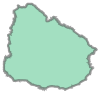

In [ ]:
# df_world_shapes = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")
# df_world_shapes

df_world_shapes = gpd.read_file("/content/c100Polygon.shp")
df_world_shapes.iloc[1].geometry




In [ ]:
def get_mask_uruguay(df_xr):
  lats = df_xr.lat.values
  lons = df_xr.lon.values
  lons, lats = np.meshgrid(lons, lats)
  polygon_uruguay = get_geometry_uruguay()

  mask_uruguay = serial_mask(lons, lats, polygon_uruguay)  
  return mask_uruguay

In [ ]:
def get_geometry_uruguay():
  df_world_shapes = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")
  df_uruguay_shapes = df_world_shapes[ df_world_shapes['ISO2'] == 'UY']
  # df_uruguay_shapes
  polygon_uruguay = df_uruguay_shapes['geometry']
  return polygon_uruguay
  # polygon_uruguay = geometry[210]
  # return gpd.GeoSeries(polygon_uruguay)

def xget_geometry_uruguay():
  df_world_shapes = gpd.read_file("/content/c100Polygon.shp")
  return df_world_shapes.iloc[1].geometry


In [ ]:
shape_uruguay = get_geometry_uruguay()
shape_uruguay

210    POLYGON ((-57.80640 -30.74822, -57.81222 -30.7...
Name: geometry, dtype: geometry

In [ ]:
# shape_uruguay = get_geometry_uruguay()
# polygon_uruguay = shape_uruguay[210]
# polygon_uruguay

## cargamos los datasets

In [ ]:
df_master_inumet_sbpp_nearest_neighbors = pd.read_pickle(file_nc_master_inumet_sbpp_nearest_neighbors, compression="gzip")
df_master_ute_sbpp_nearest_neighbors = pd.read_pickle(file_nc_master_ute_sbpp_nearest_neighbors, compression="gzip")

df_master_view_inumet_sbpp = pd.read_pickle(file_nc_master_view_inumet_sbpp, compression="gzip")
df_master_view_ute_sbpp = pd.read_pickle(file_nc_master_view_ute_sbpp, compression="gzip")



In [ ]:
# manejo de los missing values -598   <<--- CRITICO

# UTE
mask = df_master_view_ute_sbpp['precipitation']<0
df_master_view_ute_sbpp.loc[mask, ['precipitation']] = np.nan


# Inumet
mask = df_master_view_inumet_sbpp['precipitation']<0
df_master_view_inumet_sbpp.loc[mask, ['precipitation']] = np.nan



In [ ]:
df_master_inumet_sbpp_nearest_neighbors

,lat,lon,source,inumet_lat,inumet_lon,inumet_distance,inumet_source,persiann_lat,persiann_lon,persiann_distance,...,chirps_distance,chirps_source,imerg_final_lat,imerg_final_lon,imerg_final_distance,imerg_final_source,imerg_late_lat,imerg_late_lon,imerg_late_distance,imerg_late_source
0,-34.493568,-54.312595,inumet,-34.493568,-54.312595,0.000119,inumet,-34.480000,-54.320000,1.205285,...,1.831654,chirps,-34.450001,-54.350002,5.028105,imerg_final,-34.450001,-54.350002,5.028105,imerg_late
1,-34.860653,-56.207386,inumet,-34.860653,-56.207386,0.000142,inumet,-34.880001,-56.200001,1.451342,...,2.150876,chirps,-34.849998,-56.249996,4.783708,imerg_final,-34.849998,-56.249996,4.783708,imerg_late
2,-33.536568,-56.915997,inumet,-33.536568,-56.915997,0.000110,inumet,-33.520000,-56.919998,1.099520,...,1.222970,chirps,-33.549999,-56.950001,3.867980,imerg_final,-33.549999,-56.950001,3.867980,imerg_late
3,-34.351875,-56.749672,inumet,-34.351875,-56.749672,0.000231,inumet,-34.360001,-56.759998,1.250665,...,3.083843,chirps,-34.349998,-56.749996,0.120134,imerg_final,-34.349998,-56.749996,0.120134,imerg_late
4,-33.459999,-55.630001,inumet,-33.459999,-55.630001,0.000132,inumet,-33.480000,-55.639999,1.676904,...,1.093028,chirps,-33.450001,-55.649998,2.310494,imerg_final,-33.450001,-55.649998,2.310494,imerg_late
5,-30.398214,-56.511780,inumet,-30.398214,-56.511780,0.000203,inumet,-30.400000,-56.520000,0.920827,...,2.046956,chirps,-30.349998,-56.549999,5.177355,imerg_final,-30.349998,-56.549999,5.177355,imerg_late
6,-34.164001,-58.032001,inumet,-34.164001,-58.032001,0.000187,inumet,-34.160000,-58.040001,0.920295,...,1.012414,chirps,-34.150002,-58.049999,2.164375,imerg_final,-34.150002,-58.049999,2.164375,imerg_late
7,-33.250515,-58.069077,inumet,-33.250515,-58.069077,0.000082,inumet,-33.240002,-58.080002,1.363073,...,1.583734,chirps,-33.250000,-58.049999,2.121488,imerg_final,-33.250000,-58.049999,2.121488,imerg_late
8,-33.351074,-56.502346,inumet,-33.351074,-56.502346,0.000104,inumet,-33.360001,-56.520000,2.038115,...,2.915666,chirps,-33.349998,-56.549999,5.299291,imerg_final,-33.349998,-56.549999,5.299291,imerg_late
9,-34.539841,-55.873581,inumet,-34.539841,-55.873581,0.000112,inumet,-34.520000,-55.880001,1.428737,...,0.939160,chirps,-34.549999,-55.850002,2.697280,imerg_final,-34.549999,-55.850002,2.697280,imerg_late


# Visualizamos las estaciones INUMET y sus cercanos

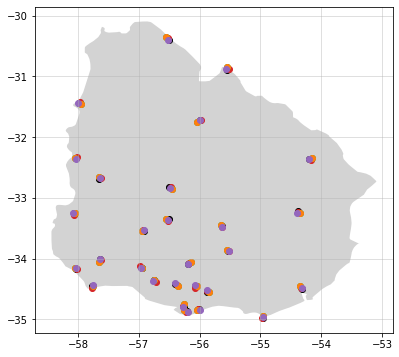

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
 
get_geometry_uruguay().plot(color="lightgrey",ax=ax)
 

df = df_master_inumet_sbpp_nearest_neighbors

# inumet
geometry=[Point(xy) for xy in zip(df["lon"], df["lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="black")  

# chirps
geometry=[Point(xy) for xy in zip(df["chirps_lon"], df["chirps_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C3")  


# imerg_late
geometry=[Point(xy) for xy in zip(df["imerg_late_lon"], df["imerg_late_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C2")  


# imerg_final
geometry=[Point(xy) for xy in zip(df["imerg_final_lon"], df["imerg_final_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C1")  
 
# persiann
geometry=[Point(xy) for xy in zip(df["persiann_lon"], df["persiann_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C4")  



ax.grid(b=True, alpha=0.5)
plt.show()


In [ ]:
df_inumet_lat_lon = df_master_view_inumet_sbpp[['lat','lon']].drop_duplicates()

df_inumet_chirps_lat_lon = df_master_view_inumet_sbpp[['chirps_lat','chirps_lon']].drop_duplicates()
df_inumet_persiann_lat_lon = df_master_view_inumet_sbpp[['persiann_lat','persiann_lon']].drop_duplicates()
df_inumet_imerg_late_lat_lon = df_master_view_inumet_sbpp[['imerg_late_lat','imerg_late_lon']].drop_duplicates()
df_inumet_imerg_final_lat_lon = df_master_view_inumet_sbpp[['imerg_final_lat','imerg_final_lon']].drop_duplicates()

len(df_inumet_lat_lon), len(df_inumet_chirps_lat_lon), len(df_inumet_persiann_lat_lon), len(df_inumet_imerg_late_lat_lon), len(df_inumet_imerg_final_lat_lon)

(28, 28, 28, 28, 28)

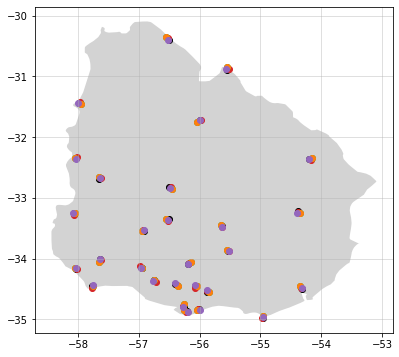

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
 
get_geometry_uruguay().plot(color="lightgrey",ax=ax)
 

# df = df_master_inumet_sbpp_nearest_neighbors

# inumet
geometry=[Point(xy) for xy in zip(df_inumet_lat_lon["lon"], df_inumet_lat_lon["lat"])]
geodata=gpd.GeoDataFrame(df_inumet_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="black")  

# chirps
geometry=[Point(xy) for xy in zip(df_inumet_chirps_lat_lon["chirps_lon"], df_inumet_chirps_lat_lon["chirps_lat"])]
geodata=gpd.GeoDataFrame(df_inumet_chirps_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C3")  


# imerg_late
geometry=[Point(xy) for xy in zip(df_inumet_imerg_late_lat_lon["imerg_late_lon"], df_inumet_imerg_late_lat_lon["imerg_late_lat"])]
geodata=gpd.GeoDataFrame(df_inumet_imerg_late_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C2")  


# imerg_final
geometry=[Point(xy) for xy in zip(df_inumet_imerg_final_lat_lon["imerg_final_lon"], df_inumet_imerg_final_lat_lon["imerg_final_lat"])]
geodata=gpd.GeoDataFrame(df_inumet_imerg_final_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C1")  
 
# persiann
geometry=[Point(xy) for xy in zip(df_inumet_persiann_lat_lon["persiann_lon"], df_inumet_persiann_lat_lon["persiann_lat"])]
geodata=gpd.GeoDataFrame(df_inumet_persiann_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C4")  



ax.grid(b=True, alpha=0.5)
plt.show()


In [ ]:
# df_master_view_inumet_sbpp.columns

In [ ]:
df_master_view_inumet_sbpp[[
              'precipitation', 
              'chirps_precipitation',  
              'persiann_precipitation',
              'imerg_final_precipitation',
              'imerg_late_precipitation'
       ]].sum()

precipitation                7.634995e+05
chirps_precipitation         7.654308e+05
persiann_precipitation       8.143730e+05
imerg_final_precipitation    7.894816e+05
imerg_late_precipitation     1.090423e+06
dtype: float32

# Visualizamos las estaciones UTE y sus cercanos

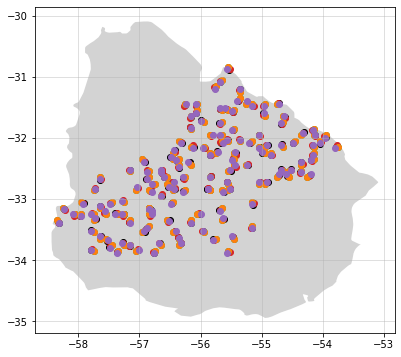

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
 
get_geometry_uruguay().plot(color="lightgrey",ax=ax)
 

df = df_master_ute_sbpp_nearest_neighbors

# ute
geometry=[Point(xy) for xy in zip(df["lon"], df["lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="black")  

# chirps
geometry=[Point(xy) for xy in zip(df["chirps_lon"], df["chirps_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C3")  


# imerg_late
geometry=[Point(xy) for xy in zip(df["imerg_late_lon"], df["imerg_late_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C2")  


# imerg_final
geometry=[Point(xy) for xy in zip(df["imerg_final_lon"], df["imerg_final_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C1")  
 
# persiann
geometry=[Point(xy) for xy in zip(df["persiann_lon"], df["persiann_lat"])]
geodata=gpd.GeoDataFrame(df,  geometry=geometry)
geodata.plot(ax=ax, color="C4")  


ax.grid(b=True, alpha=0.5)
plt.show()


In [ ]:
df_ute_lat_lon = df_master_view_ute_sbpp[['lat','lon']].drop_duplicates()

df_ute_chirps_lat_lon = df_master_view_ute_sbpp[['chirps_lat','chirps_lon']].drop_duplicates()
df_ute_persiann_lat_lon = df_master_view_ute_sbpp[['persiann_lat','persiann_lon']].drop_duplicates()
df_ute_imerg_late_lat_lon = df_master_view_ute_sbpp[['imerg_late_lat','imerg_late_lon']].drop_duplicates()
df_ute_imerg_final_lat_lon = df_master_view_ute_sbpp[['imerg_final_lat','imerg_final_lon']].drop_duplicates()

len(df_ute_lat_lon), len(df_ute_chirps_lat_lon), len(df_ute_persiann_lat_lon), len(df_ute_imerg_late_lat_lon), len(df_ute_imerg_final_lat_lon)

(140, 136, 137, 135, 135)

In [ ]:
# len(df_ute_lat_lon), len(df_ute_chirps_lat_lon), len(df_ute_persiann_lat_lon), len(df_ute_imerg_late_lat_lon), len(df_ute_imerg_final_lat_lon)
# (140, 136, 89, 135, 135)

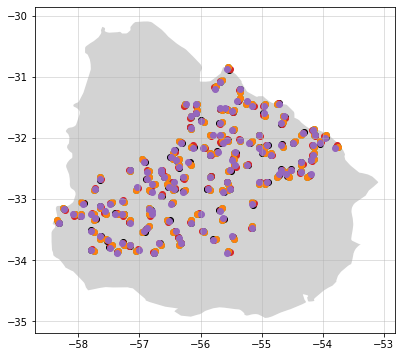

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
 
get_geometry_uruguay().plot(color="lightgrey",ax=ax)
 

# df = df_master_ute_sbpp_nearest_neighbors

# ute
geometry=[Point(xy) for xy in zip(df_ute_lat_lon["lon"], df_ute_lat_lon["lat"])]
geodata=gpd.GeoDataFrame(df_ute_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="black")  

# chirps 136, 
geometry=[Point(xy) for xy in zip(df_ute_chirps_lat_lon["chirps_lon"], df_ute_chirps_lat_lon["chirps_lat"])]
geodata=gpd.GeoDataFrame(df_ute_chirps_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C3")  


# imerg_late  135
geometry=[Point(xy) for xy in zip(df_ute_imerg_late_lat_lon["imerg_late_lon"], df_ute_imerg_late_lat_lon["imerg_late_lat"])]
geodata=gpd.GeoDataFrame(df_ute_imerg_late_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C2")  


# imerg_final 135,
geometry=[Point(xy) for xy in zip(df_ute_imerg_final_lat_lon["imerg_final_lon"], df_ute_imerg_final_lat_lon["imerg_final_lat"])]
geodata=gpd.GeoDataFrame(df_ute_imerg_final_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C1")  
 
# persiann 89, 
geometry=[Point(xy) for xy in zip(df_ute_persiann_lat_lon["persiann_lon"], df_ute_persiann_lat_lon["persiann_lat"])]
geodata=gpd.GeoDataFrame(df_ute_persiann_lat_lon,  geometry=geometry)
geodata.plot(ax=ax, color="C4")  



ax.grid(b=True, alpha=0.5)
plt.show()


In [ ]:
# hay un problema con    persiann 89, ya que la resolucion espacial es mayor, 
# Nota: podemos usar interpolacion para mejorar la precision 
# Nota: hay que validar que sean los mejores celdas de Persiann


In [ ]:
df_master_view_ute_sbpp[[
              'precipitation', 
              'chirps_precipitation',  
              'persiann_precipitation',
              'imerg_final_precipitation',
              'imerg_late_precipitation'
       ]].sum()

precipitation                3587608.00
chirps_precipitation         3961867.50
persiann_precipitation       4006524.00
imerg_final_precipitation    3982947.75
imerg_late_precipitation     5316629.50
dtype: float32

# Comparacion

In [ ]:
global_drive_db = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/04BaseDeDatos/"


In [ ]:
# ANTERIOR
filename = global_drive_db+"/UTE/stage03_ute_sbpp_report_ext_2000_2020.pickle"
!ls -lhas "$filename"
stg03_ute = pd.read_pickle(filename)
# stg03_ute

filename = global_drive_db+"/INUMET/stage03_inumet_sbpp_report_ext_2000_2020.pickle"
!ls -lhas "$filename"
stg03_inumet = pd.read_pickle(filename)
# stg03_inumet


# NUEVO 
df_master_view_inumet_sbpp = pd.read_pickle(file_nc_master_view_inumet_sbpp, compression="gzip")
df_master_view_ute_sbpp = pd.read_pickle(file_nc_master_view_ute_sbpp, compression="gzip")


477M -rw------- 1 root root 477M Apr 13 03:29 '/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/04BaseDeDatos//UTE/stage03_ute_sbpp_report_ext_2000_2020.pickle'
96M -rw------- 1 root root 96M Apr 13 02:48 '/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/04BaseDeDatos//INUMET/stage03_inumet_sbpp_report_ext_2000_2020.pickle'


In [ ]:
mask = df_master_view_ute_sbpp['chirps_precipitation']<0;
# df_master_view_ute_sbpp.loc[mask, ['chirps_precipitation']] = np.nan
df_master_view_ute_sbpp[mask]

,time,lat,lon,precipitation,_source,ute_lat,ute_lon,chirps_lat,chirps_lon,imerg_late_lat,imerg_late_lon,imerg_final_lat,imerg_final_lon,persiann_lat,persiann_lon,chirps_precipitation,persiann_precipitation,imerg_final_precipitation,imerg_late_precipitation


In [ ]:

# manejo de los missing values -598   <<--- CRITICO

# UTE
mask = df_master_view_ute_sbpp['precipitation']<0;df_master_view_ute_sbpp.loc[mask, ['precipitation']] = np.nan

mask = df_master_view_ute_sbpp['chirps_precipitation']<0;df_master_view_ute_sbpp.loc[mask, ['chirps_precipitation']] = np.nan
mask = df_master_view_ute_sbpp['persiann_precipitation']<0;df_master_view_ute_sbpp.loc[mask, ['persiann_precipitation']] = np.nan
mask = df_master_view_ute_sbpp['imerg_final_precipitation']<0;df_master_view_ute_sbpp.loc[mask, ['imerg_final_precipitation']] = np.nan
mask = df_master_view_ute_sbpp['imerg_late_precipitation']<0;df_master_view_ute_sbpp.loc[mask, ['imerg_late_precipitation']] = np.nan

# Inumet
mask = df_master_view_inumet_sbpp['precipitation']<0;df_master_view_inumet_sbpp.loc[mask, ['precipitation']] = np.nan

mask = df_master_view_inumet_sbpp['chirps_precipitation']<0;df_master_view_inumet_sbpp.loc[mask, ['chirps_precipitation']] = np.nan
mask = df_master_view_inumet_sbpp['persiann_precipitation']<0;df_master_view_inumet_sbpp.loc[mask, ['persiann_precipitation']] = np.nan
mask = df_master_view_inumet_sbpp['imerg_final_precipitation']<0;df_master_view_inumet_sbpp.loc[mask, ['imerg_final_precipitation']] = np.nan
mask = df_master_view_inumet_sbpp['imerg_late_precipitation']<0;df_master_view_inumet_sbpp.loc[mask, ['imerg_late_precipitation']] = np.nan



In [ ]:
df_master_view_inumet_sbpp.columns

Index(['time', 'lat', 'lon', 'precipitation', '_source', 'inumet_lat',
       'inumet_lon', 'chirps_lat', 'chirps_lon', 'imerg_late_lat',
       'imerg_late_lon', 'imerg_final_lat', 'imerg_final_lon', 'persiann_lat',
       'persiann_lon', 'chirps_precipitation', 'persiann_precipitation',
       'imerg_final_precipitation', 'imerg_late_precipitation'],
      dtype='object')

In [ ]:
# stg03_ute.columns

In [ ]:
stg03_ute = stg03_ute[[
 'lat', 'lon', 'alt',
       'prec', 'estacion', 'id', 
       'chirps_lat', 'chirps_lon', 'chirps_alt','chirps_prec', 
       'imerg_final_lat', 'imerg_final_lon', 'imerg_final_alt','imerg_final_prec', 
       'imerg_late_lat', 'imerg_late_lon','imerg_late_alt', 'imerg_late_prec', 
       'persiann_lat', 'persiann_lon','persiann_alt', 'persiann_prec', 
]]
stg03_ute


,lat,lon,alt,prec,estacion,id,chirps_lat,chirps_lon,chirps_alt,chirps_prec,...,imerg_final_alt,imerg_final_prec,imerg_late_lat,imerg_late_lon,imerg_late_alt,imerg_late_prec,persiann_lat,persiann_lon,persiann_alt,persiann_prec
0,-32.167778,-55.947139,121.5,0.0,Paso de los Cuadrados,abb64642358c7cbf78f25dab3ef08d49,-32.150001,-55.949998,119.5,32.991560,...,118.0,21.202723,-32.150002,-55.950001,118.0,27.515362,-32.160000,-55.959999,115.0,7.0
1,-32.250361,-55.422083,98.5,0.0,Paso Laguna,1415689d8d96385241da60a2f9f37637,-32.250001,-55.399998,89.5,0.000000,...,105.0,0.000000,-32.250000,-55.450001,105.0,0.000000,-32.240002,-55.439999,95.5,1.0
2,-31.095389,-55.687000,154.5,NaN,Est. Ataques,59430a6e6be865ba1fc0aa03e53e2633,-31.100001,-55.699998,160.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-31.080000,-55.680000,159.0,0.0
3,-33.061111,-56.470083,137.0,0.0,Carlos Reyles,df95365ff930b3f947723e139103334b,-33.050001,-56.449998,120.5,0.000000,...,122.0,4.958195,-33.049999,-56.450001,122.0,5.980518,-33.080002,-56.480000,125.0,9.0
4,-32.657889,-56.287667,126.0,0.0,Cardozo,3a29b91038138749dd746a1e735e094b,-32.650001,-56.299998,98.5,0.000000,...,110.5,0.000000,-32.650002,-56.249996,110.5,0.000000,-32.639999,-56.279999,108.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073935,-32.675167,-56.897944,126.5,0.0,Est. Rolón - Piquet,a80401df72a218357bc10c4b14028af2,-32.700001,-56.899998,94.5,0.000000,...,121.0,0.220167,-32.650002,-56.850002,121.0,0.216656,-32.680000,-56.880001,111.0,0.0
1073936,-32.078083,-54.484917,138.5,0.0,Palleros,46dac05355a2d48f68daa604d038a5ce,-32.100001,-54.499998,128.0,4.259891,...,140.5,0.058971,-32.049999,-54.450001,140.5,0.408326,-32.080002,-54.480000,129.0,1.0
1073937,-33.828750,-57.788056,81.0,7.0,Corralito,3d1b02d7940bf2652c9d88cc073e1d1d,-33.850001,-57.799998,94.5,0.000000,...,73.0,0.000000,-33.849998,-57.749996,73.0,0.000000,-33.840000,-57.799999,89.5,0.0
1073938,-33.203278,-57.575639,64.5,0.0,La Laguna,70699f8c91774c9cb8740b5ab4576367,-33.200001,-57.599998,55.0,0.000000,...,86.5,0.000000,-33.250000,-57.549999,86.5,0.000000,-33.200001,-57.560001,68.0,0.0


In [ ]:
stg03_inumet = stg03_inumet[[
 'lat', 'lon', 'alt',
       'prec', 'estacion', 'id', 
       'chirps_lat', 'chirps_lon', 'chirps_alt','chirps_prec', 
       'imerg_final_lat', 'imerg_final_lon', 'imerg_final_alt','imerg_final_prec', 
       'imerg_late_lat', 'imerg_late_lon','imerg_late_alt', 'imerg_late_prec', 
       'persiann_lat', 'persiann_lon','persiann_alt', 'persiann_prec', 
]]
stg03_inumet

,lat,lon,alt,prec,estacion,id,chirps_lat,chirps_lon,chirps_alt,chirps_prec,...,imerg_final_alt,imerg_final_prec,imerg_late_lat,imerg_late_lon,imerg_late_alt,imerg_late_prec,persiann_lat,persiann_lon,persiann_alt,persiann_prec
0,-32.826000,-56.498000,65.5,0.0,Pueblo Centenario,7f845ff65ede7e75f2d7c08e78cd544a,-32.850001,-56.499998,69.0,0.0,...,65.0,0.000000,-32.849998,-56.450001,65.0,0.000000,-32.840000,-56.480000,93.5,0.0
1,-33.351075,-56.502345,92.5,1.0,Durazno,600de8ea81c74831efaad1d7f0536e59,-33.350001,-56.499998,93.5,0.0,...,71.0,0.252644,-33.349998,-56.549999,71.0,0.076048,-33.360001,-56.520000,70.5,0.0
2,-31.438545,-57.981237,39.5,0.0,Salto,a1f709d0d2015a75e7124206eac310b5,-31.450001,-57.999998,45.0,0.0,...,17.5,0.000000,-31.450001,-57.950001,17.5,0.221477,-31.440001,-58.000000,34.5,0.0
3,-34.539840,-55.873580,47.5,0.0,San Jacinto,8ac26d850f310a3f37c8341f82aee49b,-34.550001,-55.849998,42.0,0.0,...,45.5,0.000000,-34.549999,-55.850002,45.5,0.000000,-34.520000,-55.880001,55.5,0.0
4,-33.880000,-55.530000,196.5,0.0,Cerro Colorado,24f5c9b152dfa8d5dec835e67e930334,-33.900001,-55.549998,209.0,0.0,...,207.0,0.000000,-33.849998,-55.549999,207.0,0.000000,-33.880001,-55.520000,225.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,-33.250514,-58.069076,14.5,0.0,Mercedes,8f3a02c856bc5d07dbe8f2c3a9ad002d,-33.250001,-58.049998,3.5,0.0,...,3.5,0.000000,-33.250000,-58.049999,3.5,0.000000,-33.240002,-58.080002,5.0,0.0
214784,-31.438545,-57.981237,39.5,0.0,Salto,a1f709d0d2015a75e7124206eac310b5,-31.450001,-57.999998,45.0,0.0,...,17.5,0.044302,-31.450001,-57.950001,17.5,0.147700,-31.440001,-58.000000,34.5,1.0
214785,-32.351667,-54.193333,109.5,0.0,Melo,b347652d05038f17093afe05a46cd8db,-32.350001,-54.199998,99.0,0.0,...,111.5,0.000000,-32.349998,-54.149998,111.5,0.000000,-32.360001,-54.200001,98.0,1.0
214786,-33.222860,-54.387341,46.0,0.0,Treinta y Tres,4cd5201774a4a38c30ea08ebee73964f,-33.200001,-54.399998,32.0,0.0,...,46.5,0.000000,-33.250000,-54.350002,46.5,0.000000,-33.240002,-54.400002,33.5,0.0


## por gauge

In [ ]:
df_master_view_inumet_sbpp['precipitation'].sum(), stg03_inumet['prec'].sum()

(763499.5, 763499.3599999999)

In [ ]:
df_master_view_ute_sbpp['precipitation'].sum(), stg03_ute['prec'].sum()

(3587608.0, 3587608.0)

## por sbpp

In [ ]:
inumet_diff = df_master_view_inumet_sbpp['precipitation'].sum() -  stg03_inumet['prec'].sum()
inumet_chirps_diff = df_master_view_inumet_sbpp['chirps_precipitation'].sum() -  stg03_inumet['chirps_prec'].sum()
inumet_persiann_diff = df_master_view_inumet_sbpp['persiann_precipitation'].sum() -  stg03_inumet['persiann_prec'].sum()
inumet_imerg_late_diff = df_master_view_inumet_sbpp['imerg_late_precipitation'].sum() -  stg03_inumet['imerg_late_prec'].sum()
inumet_imerg_final_diff = df_master_view_inumet_sbpp['imerg_final_precipitation'].sum() -  stg03_inumet['imerg_final_prec'].sum()

inumet_diff, inumet_chirps_diff, inumet_persiann_diff, inumet_imerg_late_diff, inumet_imerg_final_diff


(0.14000000013038516,
 271.1702898471849,
 -12996.0,
 -17932.787078975467,
 -13005.512248920742)

In [ ]:
ute_diff = df_master_view_ute_sbpp['precipitation'].sum() - stg03_ute['prec'].sum()
ute_chirps_diff = df_master_view_ute_sbpp['chirps_precipitation'].sum() - stg03_ute['chirps_prec'].sum()
ute_persiann_diff = df_master_view_ute_sbpp['persiann_precipitation'].sum() - stg03_ute['persiann_prec'].sum()
ute_imerg_late_diff = df_master_view_ute_sbpp['imerg_late_precipitation'].sum() - stg03_ute['imerg_late_prec'].sum()
ute_imerg_final_diff = df_master_view_ute_sbpp['imerg_final_precipitation'].sum() - stg03_ute['imerg_final_prec'].sum()

ute_diff, ute_chirps_diff, ute_persiann_diff, ute_imerg_late_diff, ute_imerg_final_diff


(0.0, -118840.56661305623, -179852.0, -227976.86392970942, -169799.366214409)

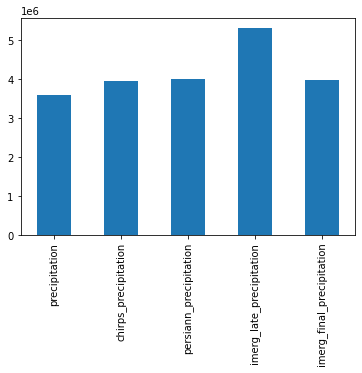

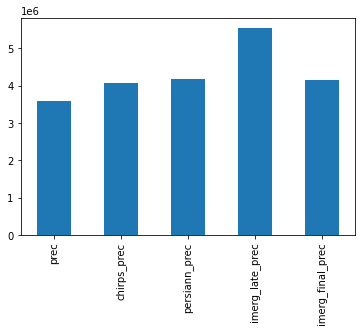

In [ ]:
x = df_master_view_ute_sbpp[['precipitation','chirps_precipitation','persiann_precipitation','imerg_late_precipitation','imerg_final_precipitation']]
x.sum().plot.bar(); plt.show()
x = stg03_ute[['prec','chirps_prec','persiann_prec','imerg_late_prec','imerg_final_prec']]
x.sum().plot.bar(); plt.show()

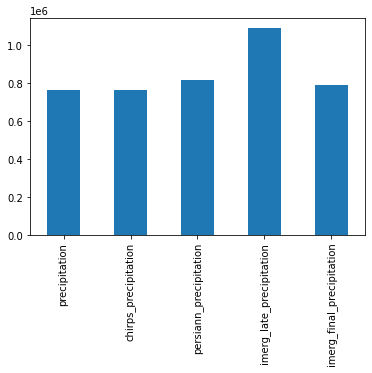

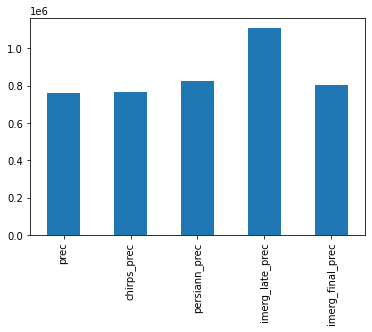

In [ ]:
x = df_master_view_inumet_sbpp[['precipitation','chirps_precipitation','persiann_precipitation','imerg_late_precipitation','imerg_final_precipitation']]
x.sum().plot.bar(); plt.show()
x = stg03_inumet[['prec','chirps_prec','persiann_prec','imerg_late_prec','imerg_final_prec']]
x.sum().plot.bar(); plt.show()